# 1. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

* 데이터 프레임 관련 라이브러리

In [1]:
#라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as spst
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

### **나.  학습데이터 불러오기**

In [124]:
df = pd.read_csv('train_dataset.csv', sep=",", encoding = 'UTF-8')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


### **다.  데이터 전처리**

In [125]:
# 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트 => -1, 'benign'은 정상사이트 => 1)
# 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트 => 1, 'benign'은 정상사이트 => 0)
df['Result_v1'] = df['Result_v1'].map({'malicious':1, 'benign':0})
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,0


In [126]:
df['Result_v1'] = df['Result_v1'].map({1:-1, 0:1})
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1


In [127]:
df.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [128]:
# 결측치 제거
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3662 non-null   float64
 1   url_num_hyphens_dom      3662 non-null   float64
 2   url_path_len             3662 non-null   float64
 3   url_domain_len           3662 non-null   float64
 4   url_hostname_len         3662 non-null   float64
 5   url_num_dots             3662 non-null   float64
 6   url_num_underscores      3662 non-null   float64
 7   url_query_len            3662 non-null   float64
 8   url_num_query_para       3662 non-null   float64
 9   url_ip_present           3662 non-null   float64
 10  url_entropy              3662 non-null   float64
 11  url_chinese_present      3662 non-null   float64
 12  url_port                 3662 non-null   float64
 13  html_num_tags('iframe')  3662 non-null   float64
 14  html_num_tags('script') 

In [129]:
df.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [130]:
# 중복 데이터 제거
df = df.drop_duplicates()
df

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,...,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,0.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,-1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,1


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3231 non-null   float64
 1   url_num_hyphens_dom      3231 non-null   float64
 2   url_path_len             3231 non-null   float64
 3   url_domain_len           3231 non-null   float64
 4   url_hostname_len         3231 non-null   float64
 5   url_num_dots             3231 non-null   float64
 6   url_num_underscores      3231 non-null   float64
 7   url_query_len            3231 non-null   float64
 8   url_num_query_para       3231 non-null   float64
 9   url_ip_present           3231 non-null   float64
 10  url_entropy              3231 non-null   float64
 11  url_chinese_present      3231 non-null   float64
 12  url_port                 3231 non-null   float64
 13  html_num_tags('iframe')  3231 non-null   float64
 14  html_num_tags('script') 

In [132]:
df.drop(['url_chinese_present', "html_num_tags('applet')"], axis = 1, inplace = True)

In [133]:
df

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,...,0.0,63.0,0.0,0.0,17.0,1.0,1.0,1.0,45.0,1
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,-1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,1


In [134]:
target = 'Result_v1'
x = df.drop(target, axis = 1)
y = df.loc[:, target]

In [135]:
y.head()

0   -1
1    1
2    1
3    1
4    1
Name: Result_v1, dtype: int64

In [136]:
cat_cols = ['url_ip_present','url_port']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [137]:
# train_test_split 사용
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [138]:
print(x_train.shape[0])
print(x_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

2584
647
2584
647


### **마. Confusion Matrix 함수 정의**


**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [20]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [139]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

---

## ※ AI 모델 만들기

In [23]:
!pip install xgboost

In [24]:
# 1. import
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 모델링
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import make_moons, make_classification
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier, plot_tree
from sklearn.metrics import * 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings(action='ignore')

In [140]:
test = pd.read_csv('test_dataset_v01.csv')
test.drop('Unnamed: 0', axis = 1, inplace = True)

cat_cols = ['url_ip_present','url_port']
test = pd.get_dummies(test, columns = cat_cols, drop_first = True)
test.drop(['url_chinese_present', "html_num_tags('applet')"], axis = 1, inplace = True)

test.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_entropy,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),url_ip_present_1,url_port_1
0,97,0,80.0,17.0,17.0,4,0,0,0,4.844913,...,5.0,0,0,12,1,1,1.0,3.0,0,0
1,37,0,22.0,15.0,15.0,3,1,0,0,4.246157,...,NaN,0,0,158,1,1,NaN,NaN,0,0
2,44,0,NaN,20.0,20.0,3,3,0,0,4.612835,...,6.0,3,3,34,1,1,0.0,136.0,0,0
3,40,0,14.0,26.0,26.0,2,0,0,0,4.238521,...,NaN,0,0,29,1,1,1.0,2.0,0,0
4,43,2,NaN,26.0,26.0,2,0,0,0,4.240669,...,NaN,0,0,41,1,1,NaN,NaN,0,0


In [141]:
test.isnull().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_entropy                  0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
url_ip_present_1             0
url_port_1                   0
dtype: int64

In [81]:
# 결측치 대체

from sklearn.impute import KNNImputer

In [142]:
imputer = KNNImputer(n_neighbors=3)

In [143]:
test1_filled = imputer.fit_transform(test)

In [144]:
test.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_entropy',
       'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'url_ip_present_1', 'url_port_1'],
      dtype='object')

In [145]:
cols = test.columns

In [146]:
test1_filled = pd.DataFrame(test1_filled, columns=cols)

In [147]:
test1_filled

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_entropy,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),url_ip_present_1,url_port_1
0,97.0,0.0,80.000000,17.0,17.000000,4.0,0.0,0.0,0.0,4.844913,...,5.000000,0.0,0.0,12.0,1.0,1.0,1.000000,3.000000,0.0,0.0
1,37.0,0.0,22.000000,15.0,15.000000,3.0,1.0,0.0,0.0,4.246157,...,31.666667,0.0,0.0,158.0,1.0,1.0,1.333333,232.666667,0.0,0.0
2,44.0,0.0,24.000000,20.0,20.000000,3.0,3.0,0.0,0.0,4.612835,...,6.000000,3.0,3.0,34.0,1.0,1.0,0.000000,136.000000,0.0,0.0
3,40.0,0.0,14.000000,26.0,26.000000,2.0,0.0,0.0,0.0,4.238521,...,1.333333,0.0,0.0,29.0,1.0,1.0,1.000000,2.000000,0.0,0.0
4,43.0,2.0,17.000000,26.0,26.000000,2.0,0.0,0.0,0.0,4.240669,...,2.000000,0.0,0.0,41.0,1.0,1.0,1.000000,16.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,63.0,0.0,38.333333,17.0,37.333333,4.0,2.0,0.0,0.0,4.738082,...,18.000000,0.0,0.0,79.0,1.0,1.0,1.000000,119.000000,0.0,0.0
2437,36.0,0.0,1.000000,35.0,35.000000,2.0,0.0,0.0,0.0,4.080351,...,27.000000,0.0,0.0,57.0,1.0,1.0,1.000000,13.000000,0.0,0.0
2438,45.0,1.0,23.000000,22.0,18.000000,2.0,0.0,0.0,0.0,4.359443,...,8.000000,0.0,0.0,199.0,1.0,1.0,2.000000,77.333333,0.0,0.0
2439,24.0,0.0,10.000000,14.0,14.666667,3.0,0.0,0.0,0.0,4.260333,...,3.000000,0.0,0.0,90.0,1.0,1.0,2.000000,25.000000,1.0,0.0


In [148]:
test1_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  2441 non-null   float64
 1   url_num_hyphens_dom      2441 non-null   float64
 2   url_path_len             2441 non-null   float64
 3   url_domain_len           2441 non-null   float64
 4   url_hostname_len         2441 non-null   float64
 5   url_num_dots             2441 non-null   float64
 6   url_num_underscores      2441 non-null   float64
 7   url_query_len            2441 non-null   float64
 8   url_num_query_para       2441 non-null   float64
 9   url_entropy              2441 non-null   float64
 10  html_num_tags('iframe')  2441 non-null   float64
 11  html_num_tags('script')  2441 non-null   float64
 12  html_num_tags('embed')   2441 non-null   float64
 13  html_num_tags('object')  2441 non-null   float64
 14  html_num_tags('div')    

In [149]:
test1_filled.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_entropy                0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
url_ip_present_1           0
url_port_1                 0
dtype: int64

### 1. 로지스틱 회귀

In [94]:
# 로지스틱 회귀
m1 = LogisticRegression()
m1.fit(x_train, y_train)

LogisticRegression()

In [95]:
p1 = m1.predict(x_test)

In [96]:
# 정분류율
accuracy_score( y_test , p1 )

0.8531684698608965

In [97]:
print(confusion_matrix(y_test, p1))
print('-'*60)
print(classification_report(y_test, p1))

[[269  55]
 [ 40 283]]
------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.87      0.83      0.85       324
           1       0.84      0.88      0.86       323

    accuracy                           0.85       647
   macro avg       0.85      0.85      0.85       647
weighted avg       0.85      0.85      0.85       647



In [98]:
# 다양한 성능평가 함수들

# 정밀도
print('정밀도')
print(precision_score(y_test, p1, pos_label = -1))
print(precision_score(y_test, p1, pos_label = 1))
print('-'*20)

# 재현율
print('재현율')
print(recall_score(y_test, p1, pos_label = -1))
print(recall_score(y_test, p1, pos_label = 1))
print('-'*20)

# f1_score
print('f1_score')
print(f1_score(y_test, p1, pos_label = -1))
print(f1_score(y_test, p1, pos_label = 1))

정밀도
0.8705501618122977
0.8372781065088757
--------------------
재현율
0.8302469135802469
0.8761609907120743
--------------------
f1_score
0.8499210110584519
0.8562783661119515


In [99]:
p1_test = m1.predict(test1_filled)

In [100]:
p1_test

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

### 2. Decision Tree

In [101]:
m2 = DecisionTreeClassifier()
m2.fit(x_train,y_train)
p2 = m2.predict(x_test)

In [102]:
print(confusion_matrix(y_test, p2))
print('-'*60)
print(classification_report(y_test, p2))

[[298  26]
 [ 22 301]]
------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.93      0.92      0.93       324
           1       0.92      0.93      0.93       323

    accuracy                           0.93       647
   macro avg       0.93      0.93      0.93       647
weighted avg       0.93      0.93      0.93       647



In [103]:
depth = range(1,51)
acc1 = []

for d in depth :
    m2 = DecisionTreeClassifier(max_depth = d)
    m2.fit(x_train, y_train)
    p2 = m2.predict(x_test)
    acc1.append(accuracy_score(y_test, p2))

In [104]:
leaf_samples = range(1,201,5)
acc2 = []

for s in leaf_samples :
    m2 = DecisionTreeClassifier(min_samples_leaf = s)
    m2.fit(x_train, y_train)
    p2 = m2.predict(x_test)
    acc2.append(accuracy_score(y_test, p2))

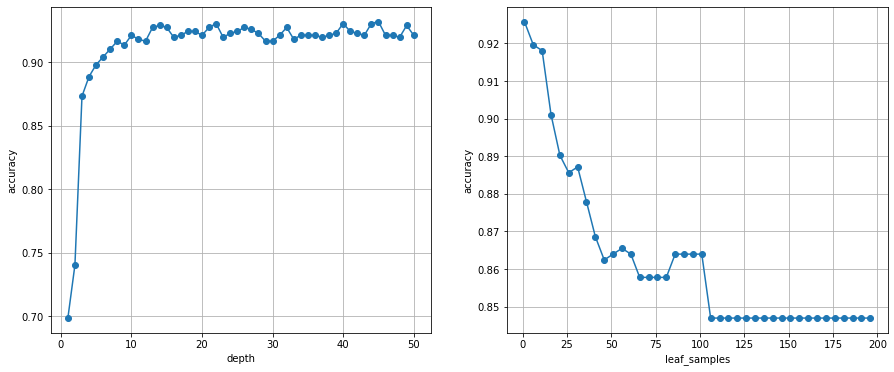

In [105]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plt.plot(depth, acc1, marker = 'o')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(leaf_samples, acc2, marker = 'o')
plt.xlabel('leaf_samples')
plt.ylabel('accuracy')
plt.grid()

In [106]:
# 변수 중요도 그래프 그리기 함수
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

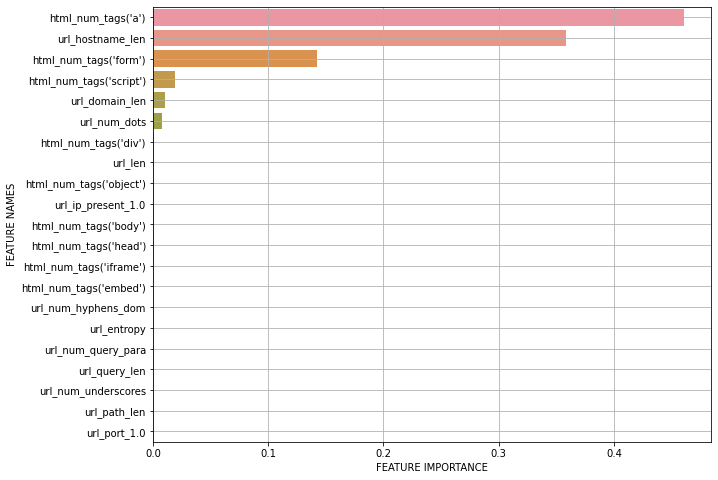

In [107]:
result = plot_feature_importance(m2.feature_importances_, list(x_train))

In [108]:
p2_test = m2.predict(test1_filled)

In [109]:
p2_test

array([-1,  1,  1, ...,  1, -1,  1], dtype=int64)

In [110]:
sub = pd.read_csv('sample_submission.csv')
sub['expected'] = p2_test

In [111]:
sub.to_csv('test.csv', index=False)

### 3. SVM

In [112]:
# 스케일링
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [113]:
m3 = SVC()
m3.fit(x_train_s, y_train)
p3 = m3.predict(x_test_s)

In [114]:
# 평가
print(confusion_matrix(y_test, p3))
print('-'*60)
print(classification_report(y_test, p3))

[[225  99]
 [ 30 293]]
------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.88      0.69      0.78       324
           1       0.75      0.91      0.82       323

    accuracy                           0.80       647
   macro avg       0.81      0.80      0.80       647
weighted avg       0.82      0.80      0.80       647



In [115]:
cost = [0.1, 1, 2, 5,10,20]
acc1 = []

for c in cost :
    m3 = SVC(C = c)
    m3.fit(x_train_s, y_train)
    p3 = m3.predict(x_test_s)
    acc1.append(accuracy_score(y_test, p3))

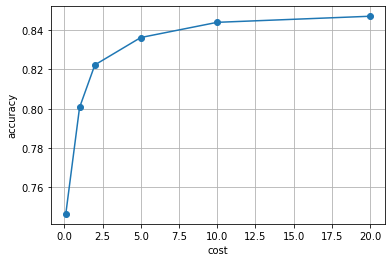

In [116]:
plt.plot(cost, acc1, marker = 'o')
plt.xlabel('cost')
plt.ylabel('accuracy')
plt.grid()

In [117]:
gamma = np.linspace(0.01, 1, 20)
acc2 = []

for g in gamma :
    m3 = SVC(gamma = g, C = 1)
    m3.fit(x_train_s, y_train)
    p3 = m3.predict(x_test_s)
    acc2.append(accuracy_score(y_test, p3))

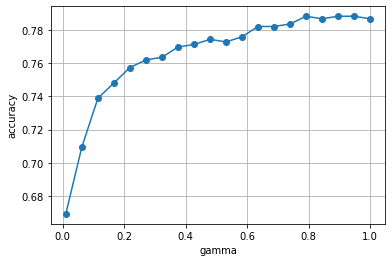

In [118]:
plt.plot(gamma, acc2, marker = 'o')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.grid()

## 4. XGBoost - n_estimators + learning rate

In [ ]:
# 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트 - 1, 'benign'은 정상사이트 - 0)

In [150]:
# 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트 => -1, 'benign'은 정상사이트 => 1)
df['Result_v1'] = df['Result_v1'].map({-1:1, 1:0})
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0


In [151]:
y

0       1
1       0
2       0
3       0
4       0
       ..
3657    0
3658    0
3659    1
3660    0
3663    0
Name: Result_v1, Length: 3231, dtype: int64

In [155]:
# train_test_split 사용
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [156]:
y_train

1212    1
1993    0
20      1
1305    0
3598    1
       ..
3630    1
2367    0
558     1
1574    1
2235    1
Name: Result_v1, Length: 2584, dtype: int64

In [157]:
grid_param = {'learning_rate':np.linspace(0.001,0.3,50),
              'n_estimators':[20,30,50,100]}
m4 = XGBClassifier(eval_metric = 'logloss')
m4_gs = GridSearchCV(m4, grid_param, cv = 3)
m4_gs.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
       0.12304082, 0.12914286, 0.1352449 , 0.14134694, 0.14744898,
       0.15355102, 0.15965306, 0.1657551 , 0.17185714, 0.17795918,
       0.18406122, 0.19016327, 0.19626531, 0.20236735, 0.20846939,
       0.21457143, 0.22067347, 0.22677551, 0.2

In [158]:
result = pd.DataFrame(m4_gs.cv_results_)

In [159]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094690,0.030660,0.006892,2.185186e-03,0.001,20,"{'learning_rate': 0.001, 'n_estimators': 20}",0.901392,0.903600,0.897793,0.900929,0.002393,194
1,0.060227,0.003264,0.004658,6.117414e-04,0.001,30,"{'learning_rate': 0.001, 'n_estimators': 30}",0.901392,0.903600,0.897793,0.900929,0.002393,194
2,0.096195,0.005316,0.004481,3.909312e-04,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.901392,0.902439,0.897793,0.900541,0.001990,197
3,0.265673,0.168729,0.004551,8.013581e-04,0.001,100,"{'learning_rate': 0.001, 'n_estimators': 100}",0.902552,0.900116,0.897793,0.900154,0.001943,199
4,0.041532,0.002257,0.003983,9.412157e-05,0.007102,20,"{'learning_rate': 0.00710204081632653, 'n_esti...",0.900232,0.900116,0.897793,0.899380,0.001123,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.139253,0.018266,0.005353,1.935330e-03,0.293898,100,"{'learning_rate': 0.29389795918367345, 'n_esti...",0.961717,0.951220,0.948897,0.953944,0.005577,27
196,0.039882,0.006986,0.003716,7.772306e-04,0.3,20,"{'learning_rate': 0.3, 'n_estimators': 20}",0.962877,0.946574,0.929152,0.946201,0.013771,90
197,0.136707,0.077233,0.010950,4.216157e-03,0.3,30,"{'learning_rate': 0.3, 'n_estimators': 30}",0.965197,0.946574,0.940767,0.950846,0.010421,68
198,0.094376,0.033870,0.004986,1.410234e-03,0.3,50,"{'learning_rate': 0.3, 'n_estimators': 50}",0.962877,0.950058,0.948897,0.953944,0.006334,28


In [160]:
p4 = m4_gs.predict(x_test)

In [161]:
print(confusion_matrix( y_test , p4  ))
print('-'*60)
print(classification_report(y_test , p4))

[[310  12]
 [ 10 315]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       322
           1       0.96      0.97      0.97       325

    accuracy                           0.97       647
   macro avg       0.97      0.97      0.97       647
weighted avg       0.97      0.97      0.97       647



In [168]:
test1_filled.columns = x_train.columns

In [169]:
p4_test = m4_gs.predict(test1_filled)

In [170]:
p4_test

array([0, 0, 0, ..., 0, 1, 1])

In [177]:
type(p4_test)

numpy.ndarray

In [179]:
p4_test = np.where(p4_test == 1, -1, 1)
p4_test

array([ 1,  1,  1, ...,  1, -1, -1])

In [180]:
p4_test = list(p4_test)

In [182]:
sub = pd.read_csv('sample_submission.csv')
sub['expected'] = p4_test

In [183]:
sub.to_csv('test4.csv', index=False)

### 5) XGB

In [184]:
m5 = XGBClassifier(n_estimators = 5)
m5.fit(x_train, y_train)
p5 = m5.predict(x_test)

In [185]:
print(classification_report(y_test, p5))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       322
           1       0.94      0.94      0.94       325

    accuracy                           0.94       647
   macro avg       0.94      0.94      0.94       647
weighted avg       0.94      0.94      0.94       647



In [186]:
params = { 'max_depth':[3,5,8], 'n_estimators':[50,100,150], 'learning_rate':[0.01,0.1,0.2]}

In [187]:
m5_1 = XGBClassifier()
m5_1_gs = GridSearchCV(m5_1, params, cv = 5, verbose = 3)

In [188]:
m5_1_gs.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.903 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.888 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.903 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.888 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.872 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.903 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.890 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.911 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.890 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.878 to

[CV 2/5] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.957 total time=   0.5s
[CV 3/5] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.956 total time=   0.5s
[CV 4/5] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.942 total time=   0.5s
[CV 5/5] END learning_rate=0.1, max_depth=8, n_estimators=150;, score=0.946 total time=   0.7s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=50;, score=0.946 total time=   0.5s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimators=50;, score=0.957 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=3, n_estimators=50;, score=0.950 total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=50;, score=0.926 total time=   0.3s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=50;, score=0.913 total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.956 total time=   0.1s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimato

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=No

In [189]:
p5_1 = m5_1_gs.predict(x_test)
print(confusion_matrix(y_test, p5_1))
print(classification_report(y_test, p5_1))

[[307  15]
 [ 12 313]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       322
           1       0.95      0.96      0.96       325

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



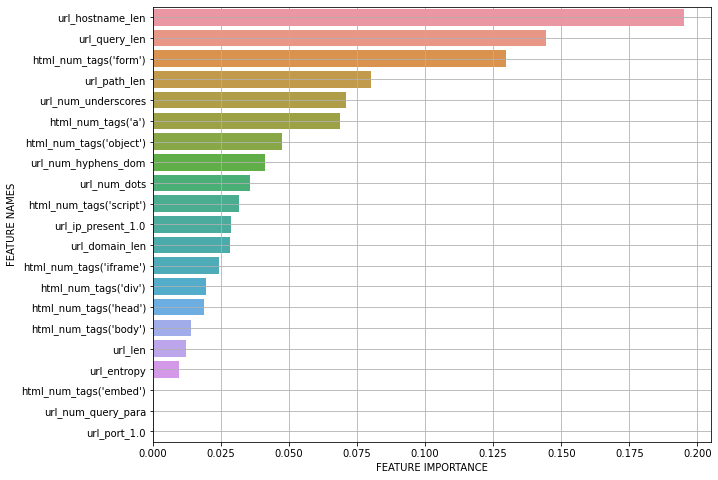

In [190]:
r = plot_feature_importance(m5_1_gs.best_estimator_.feature_importances_, list(x_train))

In [191]:
p5_test = m5_1_gs.predict(test1_filled)

In [192]:
sub = pd.read_csv('sample_submission.csv')
sub['expected'] = p5_test

In [193]:
sub.to_csv('test5_2.csv', index=False)